In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("water_potability.csv")

In [4]:
data


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


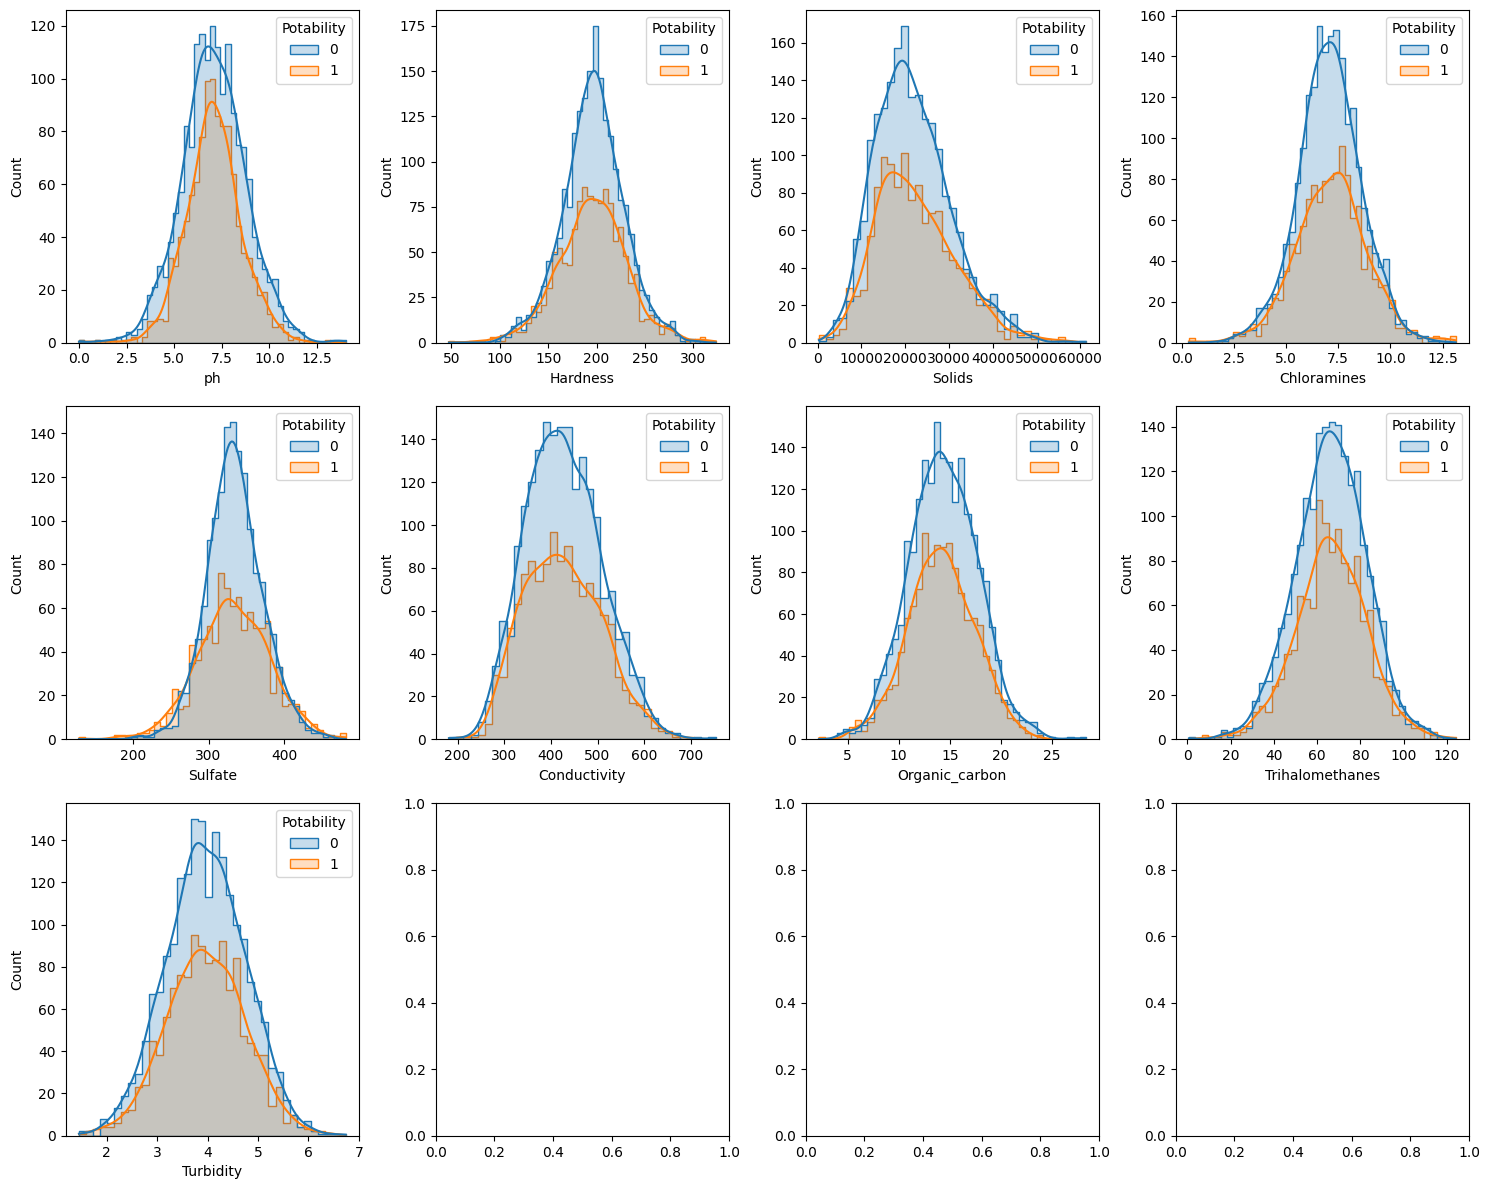

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]):
    sns.histplot(data=data, x=column, hue="Potability", element="step", kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

In [7]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
data.isna().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [12]:
def preprocessing_inputs(df):
  df = df.copy()
  # Fill Missing Val
  missing_val_col = ["ph","Sulfate","Trihalomethanes"]
  for column in missing_val_col:
     df[column] = df[column].fillna(df[column].mean())
  # Separate Target from column
  y = df['Potability']
  X = df.drop(['Potability'],axis = 1)
  # Train Test Split
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,shuffle = True)
  # Standard Scaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns)
  X_test =  pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
  return X_train,X_test,y_train,y_test

In [13]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [14]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2750,0.000523,1.102742,-0.701385,-0.476116,-0.563229,-0.752982,-1.163979,-0.423824,0.949975
496,-0.754636,-0.467771,-1.162600,-2.158684,0.627303,1.456497,-1.634727,-0.389100,0.355933
1843,0.462531,-0.093892,-0.342801,0.618541,1.232889,2.129555,-1.601284,-1.308339,-0.273538
847,1.310905,-0.021541,0.193896,0.242198,0.420514,1.558347,0.299041,0.607335,0.675624
342,-0.802744,2.644435,-0.772981,-0.305731,0.827600,3.346468,-0.337766,1.489011,-0.402001
...,...,...,...,...,...,...,...,...,...
3190,1.519044,-0.105795,3.207117,-0.516081,0.005971,-0.755311,-0.010471,2.049020,-0.400761
3046,-0.621144,-0.106831,0.111602,0.613038,0.185720,-1.604764,-0.236406,0.760744,-0.450639
1725,0.000523,2.536895,-1.213431,0.919631,-0.538283,0.515128,-1.017392,0.167378,-0.925090
2254,0.839425,1.101084,-0.624417,-0.489910,-0.901116,-0.383587,-0.141662,0.779496,-0.102425


In [15]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3023,-1.229767,1.487772,0.650402,0.007602,-2.628328,0.470953,-0.243322,-0.678738,-0.854303
769,-0.926918,-1.032098,1.429967,-0.922761,2.267860,-1.598315,-0.081215,0.660440,-0.537124
412,-0.092510,0.749793,1.642483,-0.987624,0.122188,-0.723499,1.775569,-0.845935,1.100325
1300,0.004698,-0.126476,0.398650,0.145233,-0.300264,1.525741,0.079358,-0.140458,0.027080
2968,-1.658315,-0.783863,2.213975,1.007415,0.800703,-0.597299,0.605900,-0.362930,-0.296813
...,...,...,...,...,...,...,...,...,...
1920,-0.063612,0.844078,-0.971271,-0.786794,0.005971,0.666769,0.499776,0.426874,-0.131348
2120,0.000523,0.691971,1.027766,-0.220391,-1.933025,-0.183030,0.586301,0.286527,-2.568968
1434,0.166392,-0.012485,-0.284089,-0.290265,-0.991187,-0.100923,0.873052,0.198613,-1.280099
3065,0.000523,0.823907,-0.117933,0.400653,0.188839,-1.164969,1.151007,-0.337691,0.873715


In [16]:
y_train

2750    1
496     0
1843    0
847     0
342     1
       ..
3190    1
3046    0
1725    0
2254    0
2915    0
Name: Potability, Length: 2620, dtype: int64

In [17]:
y_test

3023    0
769     1
412     0
1300    0
2968    0
       ..
1920    1
2120    0
1434    0
3065    0
1730    0
Name: Potability, Length: 656, dtype: int64

In [18]:
# random = RandomForestClassifier(n_estimators= 10, criterion="entropy")
random  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
random.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [20]:
y_pred = random.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
accuracy_score(y_test,y_pred)

0.6204268292682927

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[332  67]
 [182  75]]


In [24]:
cls = classification_report(y_test,y_pred)
print("======================================Classification_Report======================================\n",cls)

======================================Classification_Report======================================
               precision    recall  f1-score   support

           0       0.65      0.83      0.73       399
           1       0.53      0.29      0.38       257

    accuracy                           0.62       656
   macro avg       0.59      0.56      0.55       656
weighted avg       0.60      0.62      0.59       656



In [25]:
from ast import Name
def model_fit(X_train,X_test,y_train,y_test,model,name):
    model.fit(X_train,y_train)
    model_pred = model.predict(X_test)
    result = {"Model=":Name}
    result["Accuracy"]=accuracy_score(y_test,model_pred)
    result["Confusion_Matrix"]=confusion_matrix(y_test,model_pred)
    print("##################################")
    print("&&&&&&& === Model Result  ====$$$$$$$$$$$")
    print(name)
    print(classification_report(y_test,model_pred))
    print("Model Accuracy",result["Accuracy"])
    print("\n")
    print("Model Confusion_Matrix = ",result["Confusion_Matrix"])
    return result

In [26]:
random1 = RandomForestClassifier()

In [27]:
random_result=model_fit(X_train,X_test,y_train,y_test,random1,"Random_Forest_Classifier")

##################################
&&&&&&& === Model Result  ====$$$$$$$$$$$
Random_Forest_Classifier
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       399
           1       0.66      0.33      0.44       257

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.67      0.64       656

Model Accuracy 0.6707317073170732


Model Confusion_Matrix =  [[354  45]
 [171  86]]


In [28]:
random1 = RandomForestClassifier()

In [29]:
r1_result = model_fit(X_train,X_test,y_train,y_test,random,"Random_Forest_Classifieer")

##################################
&&&&&&& === Model Result  ====$$$$$$$$$$$
Random_Forest_Classifieer
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       399
           1       0.54      0.29      0.38       257

    accuracy                           0.63       656
   macro avg       0.60      0.57      0.55       656
weighted avg       0.61      0.63      0.59       656

Model Accuracy 0.6265243902439024


Model Confusion_Matrix =  [[337  62]
 [183  74]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [30]:
RFCR = RandomForestClassifier(random_state=42,bootstrap=True,criterion='gini',max_depth=5,min_samples_leaf=10)

In [31]:
RFCR_result = model_fit(X_train,X_test,y_train,y_test,RFCR,"Random_Forest_Classifieer")

##################################
&&&&&&& === Model Result  ====$$$$$$$$$$$
Random_Forest_Classifieer
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       399
           1       0.76      0.12      0.21       257

    accuracy                           0.64       656
   macro avg       0.70      0.55      0.49       656
weighted avg       0.68      0.64      0.55       656

Model Accuracy 0.6417682926829268


Model Confusion_Matrix =  [[389  10]
 [225  32]]


<Axes: >

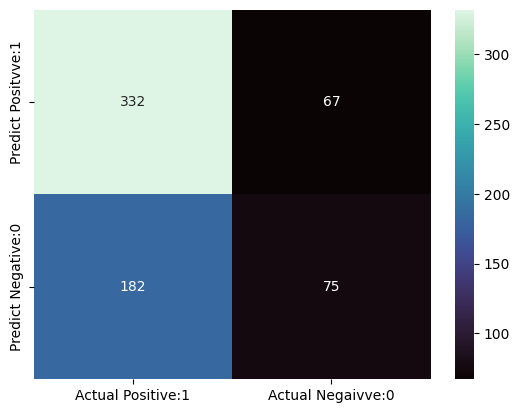

In [32]:
cm_matrix = pd.DataFrame(data=cm,columns = ["Actual Positive:1","Actual Negaivve:0"],
                        index = ['Predict Positvve:1',"Predict Negative:0"])
sns.heatmap(cm_matrix,fmt = 'd',annot = True,cmap = "mako")